## Linear Regression on Sklearn dummy Data via Tensor Flow

In [1]:
from sklearn import datasets as skds
X,y = skds.make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20.0)

In [2]:
# Rehsape NUmpy array to 2 dim

if y.ndim==1:
    y = y.reshape(len(y),1)

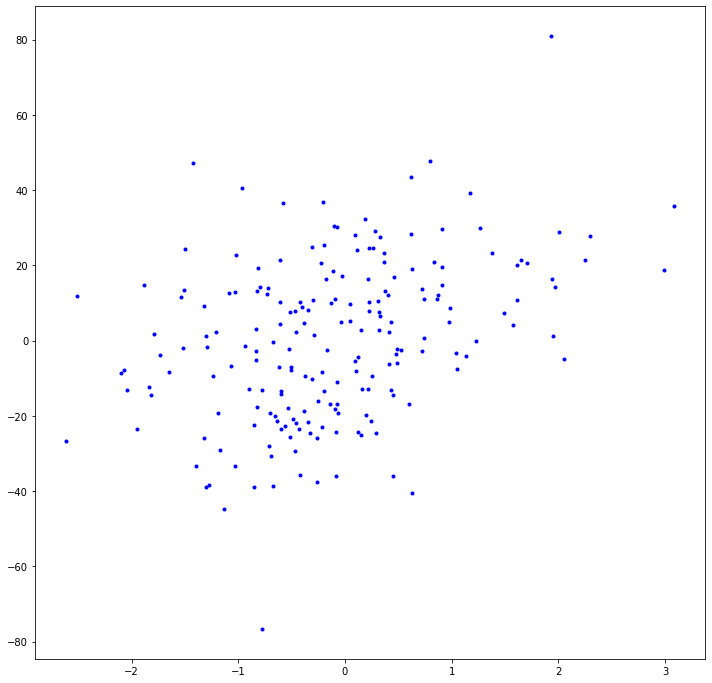

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.plot(X,y,'.b')

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape[1])

(140, 1)
(140, 1)
(60, 1)
(60, 1)
1


### Using Tensor Flow

In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
n_input = X_train.shape[1]
n_output = y_train.shape[1]
x_tensor = tf.placeholder(tf.float32,shape = [None,n_input])
y_tensor = tf.placeholder(tf.float32,shape  = [None,n_output])
w = tf.Variable(tf.zeros([n_input,n_output]),tf.float32)
b = tf.Variable(tf.zeros(n_output),tf.float32)

model = tf.matmul(x_tensor,w)+b


Instructions for updating:
non-resource variables are not supported in the long term


#### error = Y_pred - y_actual
#### Computing MSE and R^2

In [7]:
loss = tf.reduce_mean(tf.square(model-y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor-y_mean))
gof = 1- tf.div(loss,total_error)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


#### Define Optimeizer and Train Model

In [8]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
n_epoch = 1000

## W and b estimates
w_hat = 0
b_hat = 0

In [9]:
import numpy as np
loss_epochs = np.empty(shape=[n_epoch],dtype = float)
mse_epoch = np.empty(shape=[n_epoch],dtype = float)
gof_epoch = np.empty(shape=[n_epoch],dtype = float)
mse_score = 0
gof_score = 0

In [10]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(n_epoch):
        feed_dict1 = {x_tensor:X_train,y_tensor:y_train}
        loss_val,_ = tfs.run([loss,optimizer],feed_dict=feed_dict1)
        loss_epochs[epoch] = loss_val
        
        feed_dict2 = {x_tensor:X_test,y_tensor:y_test}
        mse_score,gof_score = tfs.run([loss,gof],feed_dict=feed_dict2)
        mse_epoch[epoch] = mse_score
        gof_epoch[epoch] = gof_score
    w_hat,b_hat = tfs.run([w,b])
    w_hat = w_hat.reshape(1)

print("model : Y = {}X + {}".format(round(w_hat[0],4),round(b_hat[0],4)))
print("For Test Data: MSE = {} and R^2 = {}".format(mse_score,gof_score))

model : Y = 78.52510070800781X + 0.27149999141693115
For Test Data: MSE = 560.3754272460938 and R^2 = 0.9988057613372803


In [11]:
print(X_test[1][0],y_test[1][0])
print(w_hat[0],b_hat[0])

-0.9589520021600356 -94.65417650309523
78.52511 0.27147275


In [12]:
#with tf.Session() as tfs:
#    for i in range(X_test.shape[0]):
#        val = np.float32(X_test[i][0])
#        w = tf.constant(float(w_hat[0]))
#        x = tf.constant(float(val))
#        b = tf.constant(float(b_hat[0]))
#        print("{},{}".format(tfs.run((w*x)+b),y_test[i][0]))

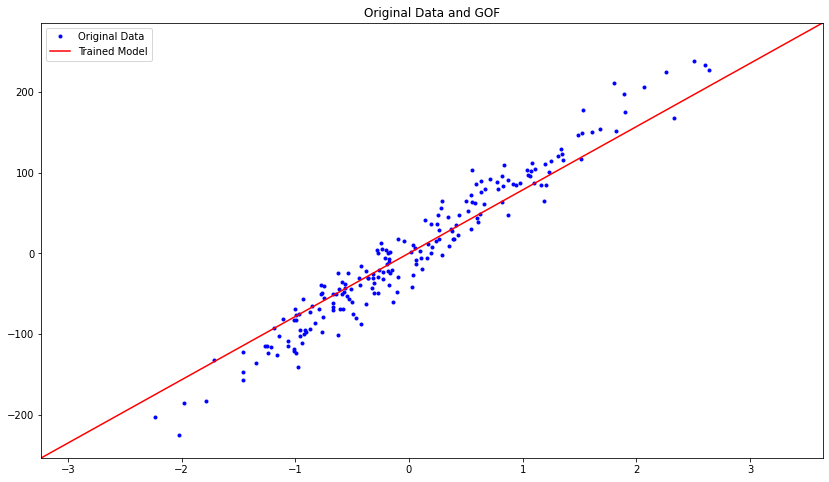

In [15]:
plt.figure(figsize=(14,8))
plt.title("Original Data and GOF")

x_plot = (np.min(X)-1,np.max(X)+1)
y_plot = w_hat * x_plot + b_hat
plt.axis([x_plot[0],x_plot[1],y_plot[0],y_plot[1]])
plt.plot(X,y,'b.',label="Original Data")
plt.plot(x_plot,y_plot,'r-',label="Trained Model")
plt.legend()
plt.show()

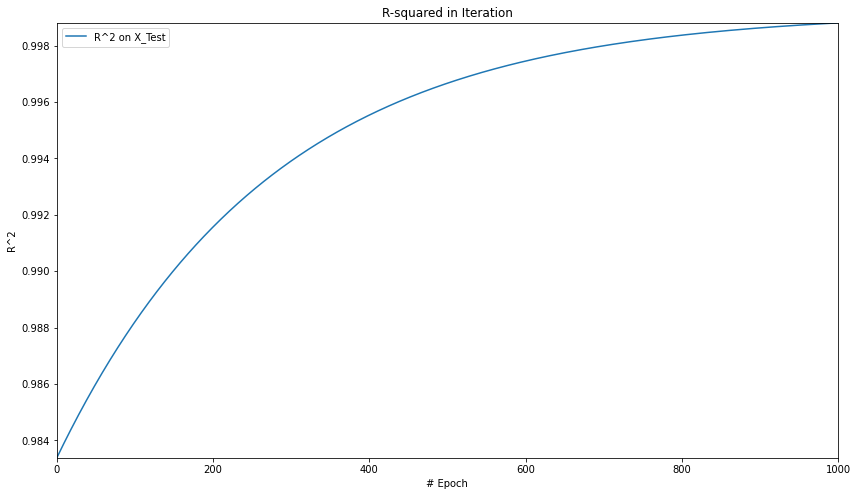

In [16]:
plt.figure(figsize=(14,8))

plt.axis([0,n_epoch,np.min(gof_epoch),np.max(gof_epoch)])
plt.title("R-squared in Iteration")
plt.plot(gof_epoch,label="R^2 on X_Test")
plt.xlabel("# Epoch")
plt.ylabel("R^2")
plt.legend()
plt.show()

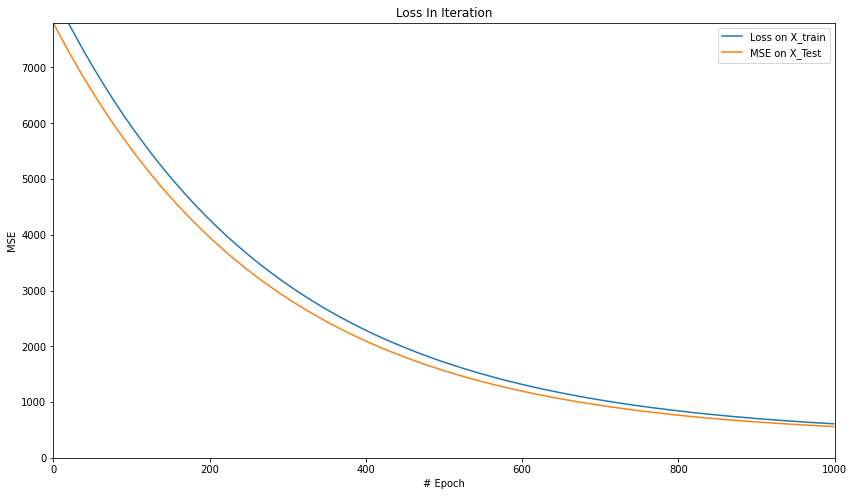

In [18]:
plt.figure(figsize=(14,8))
plt.axis([0,n_epoch,0,np.max(loss_epochs)])
plt.plot(loss_epochs,label="Loss on X_train")
plt.title("Loss In Iteration")
plt.xlabel("# Epoch")
plt.ylabel("MSE")

plt.axis([0,n_epoch,0,np.max(mse_epoch)])
plt.plot(mse_epoch,label="MSE on X_Test")
plt.xlabel("# Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()